In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['tmdb_5000_credits.csv', 'tmdb_5000_movies.csv']


In [2]:
import matplotlib.pyplot as plt  #for plot 
import seaborn as sns            #for heatmap

In [3]:
data = pd.read_csv("../input/tmdb_5000_movies.csv")   #using for read dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [5]:
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


**What we gonna do?**

*This dataset gives us about 5000 movies information.*

Firstly we will work on three title. Budget, popularity and revenue. 
* We look the correlation between popularity and revenue.
* İf a movie has high popularity, this gives the filmmaker more revenue?
* Most profitable movie made from which country?

In [6]:
data.corr()


,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


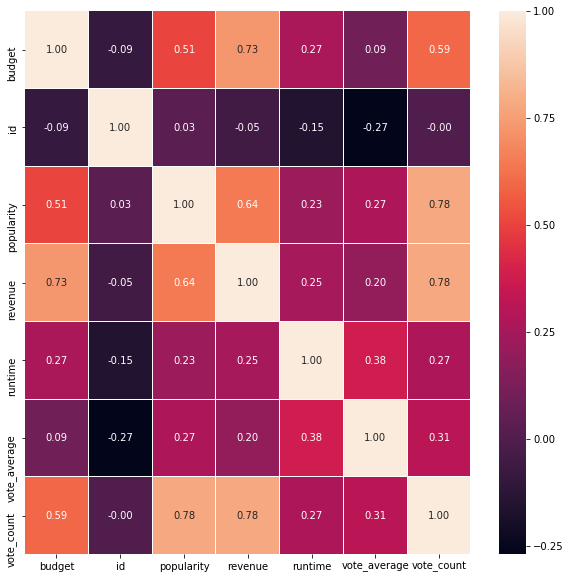

In [7]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot = True, linewidths = .1, fmt = '.2f', ax = ax)
plt.show()

When we looked correlation table;
* Budget and revenue directly proportional (Correlation value: 0,73)
* Popularity and revenue directly proportional (Correlation value: 0,64)
* Budget and popularity directly proportional (Correlation value: 0,51 *less than the others*)

In [8]:
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

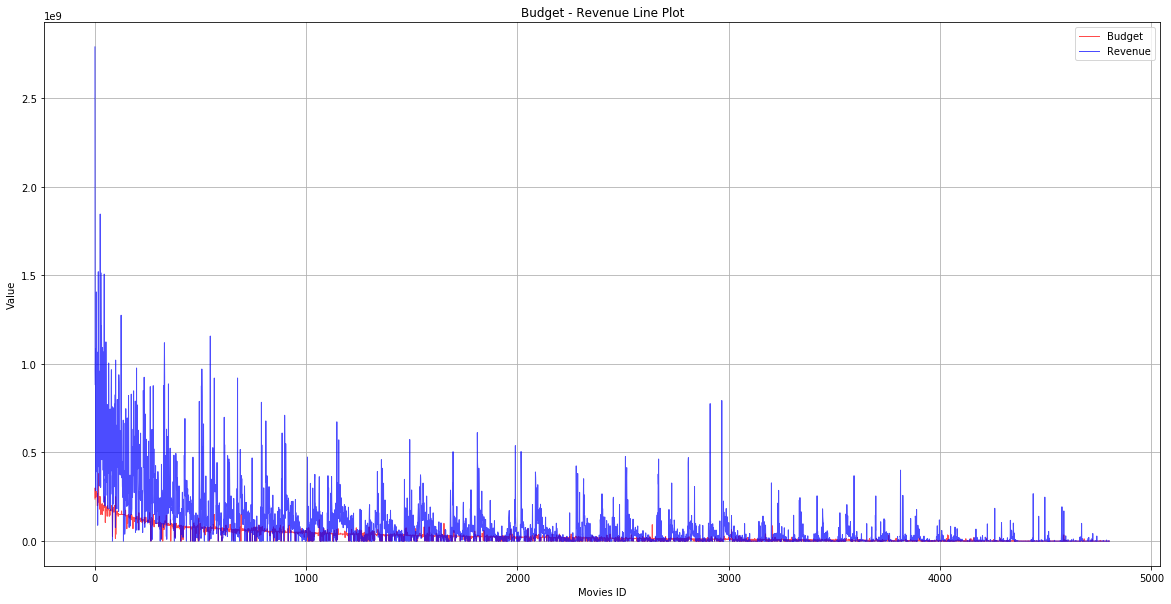

In [9]:
plt.subplot()
data.budget.plot(kind = 'line', color = 'r', label = 'Budget', linewidth = 1, alpha = 0.7, grid = True, linestyle = '-', figsize = (20,10))
data.revenue.plot(kind = 'line', color = 'b', label = 'Revenue', linewidth = 1, alpha = 0.7, grid = True, linestyle = '-', figsize = (20,10))
plt.title('Budget - Revenue Line Plot')
plt.xlabel('Movies ID')
plt.ylabel('Value')
plt.legend(loc = 'upper right')
plt.show()

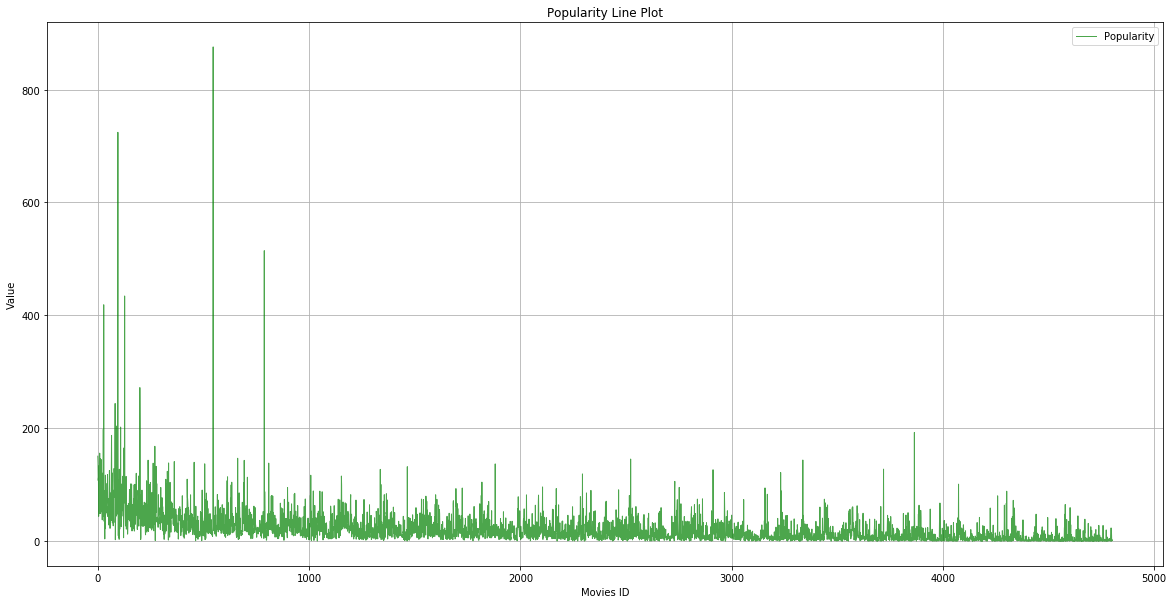

In [10]:
data.popularity.plot(kind = 'line', color = 'g', label = 'Popularity', linewidth = 1, alpha = 0.7, grid = True, linestyle = '-', figsize = (20,10))
plt.title('Popularity Line Plot')
plt.xlabel('Movies ID')
plt.ylabel('Value')
plt.legend(loc = 'upper right')
plt.show()

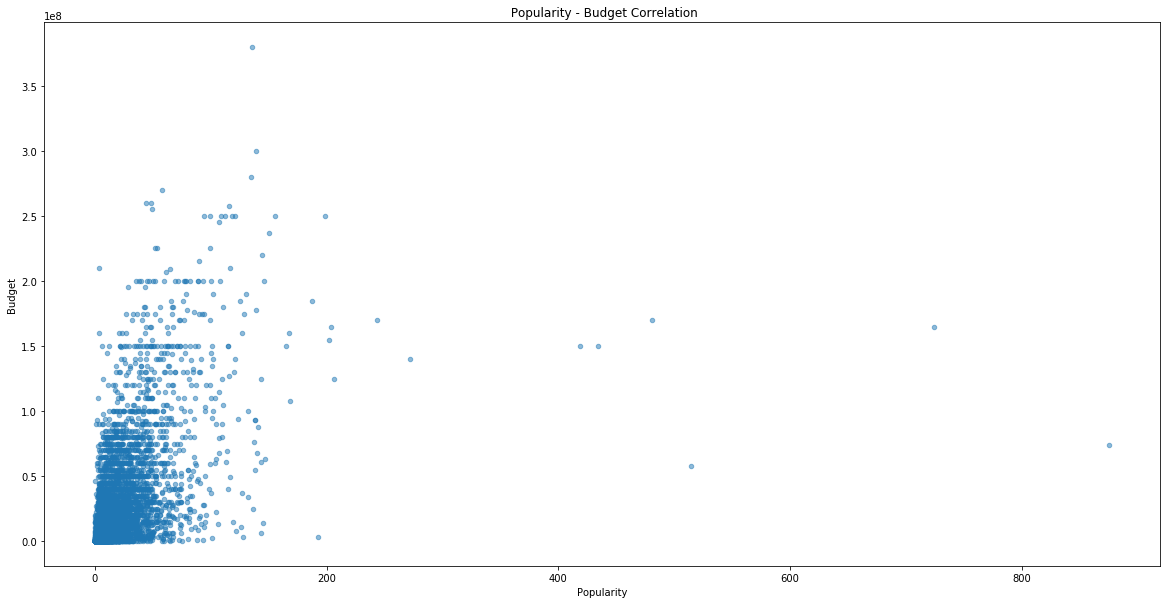

In [11]:
data.plot(kind = 'scatter', x = 'popularity',  y = 'budget', alpha = 0.5, figsize = (20,10))
plt.xlabel('Popularity')
plt.ylabel('Budget')
plt.title(' Popularity - Budget Correlation')
plt.show()


***We see that there is popularity value an accumulation between 0 and 200.***

So let's make filter and check again.

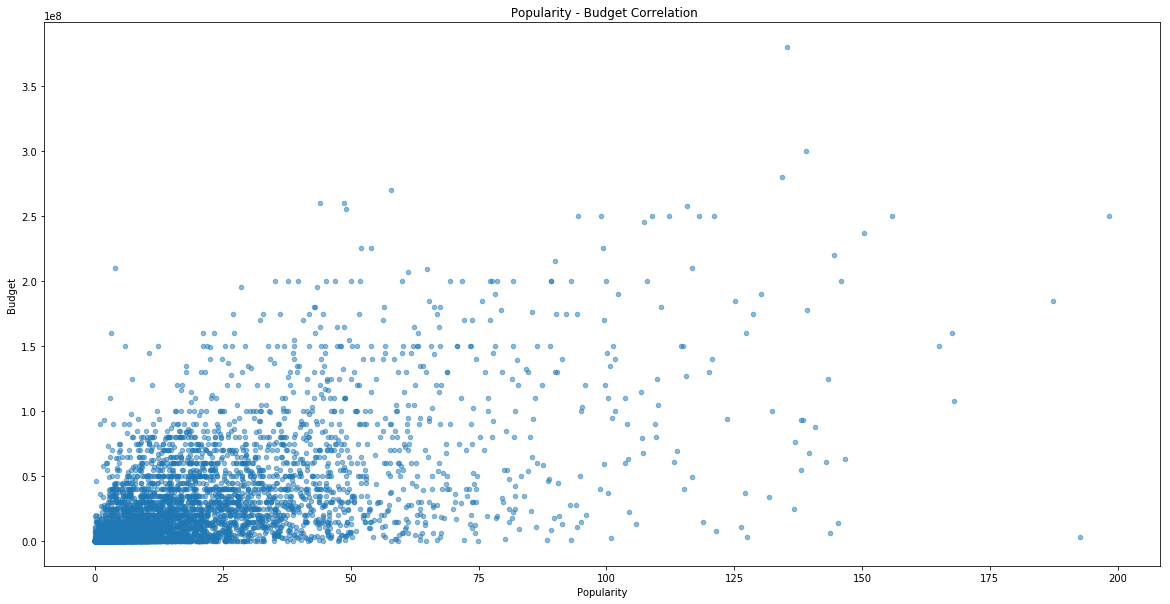

In [12]:
data_filter_p = data['popularity'] < 200
data_filter_popularity = data[data_filter_p]
data_filter_popularity.plot(kind = 'scatter', x = 'popularity', y = 'budget', alpha = 0.5, figsize = (20,10))
plt.xlabel('Popularity')
plt.ylabel('Budget')
plt.title(' Popularity - Budget Correlation')
plt.show()

***Scatter table became clearer. Let's make one more filter.***

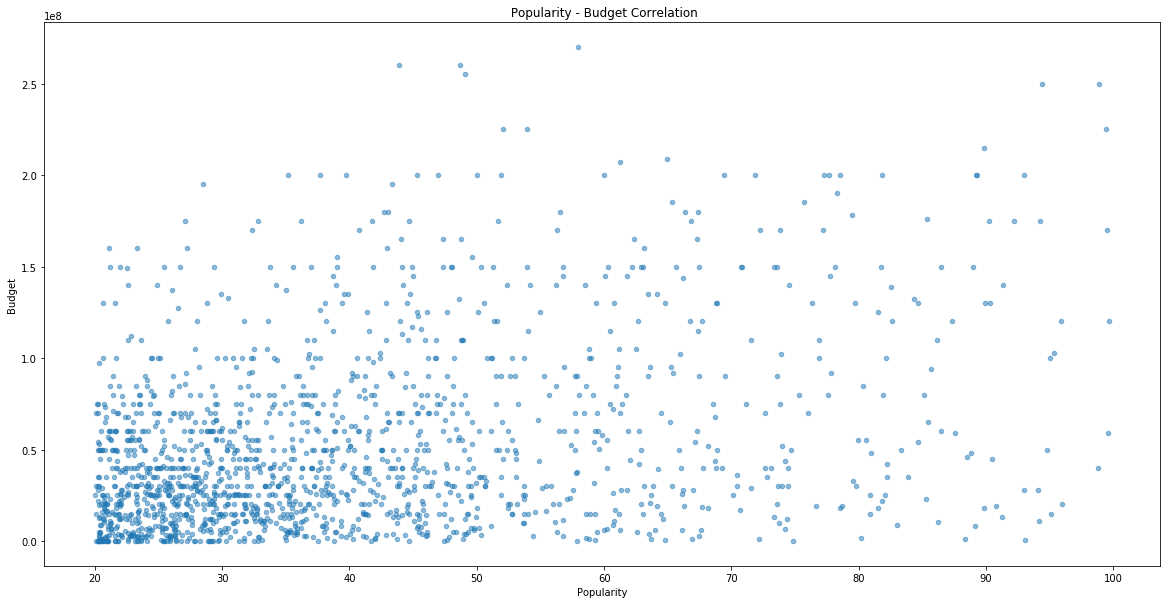

In [13]:
data_filter_p2 = np.logical_and(data['popularity'] > 20, data['popularity'] < 100)
data_filter_popularity_x2 = data[data_filter_p2]
data_filter_popularity_x2.plot(kind = 'scatter', x = 'popularity', y = 'budget', alpha = 0.5, figsize = (20,10))
plt.xlabel('Popularity')
plt.ylabel('Budget')
plt.title(' Popularity - Budget Correlation')
plt.show()

***Despite all filtering, this correlation does not provide clear information.***

**So let's look correlation between popularity with revenue.**

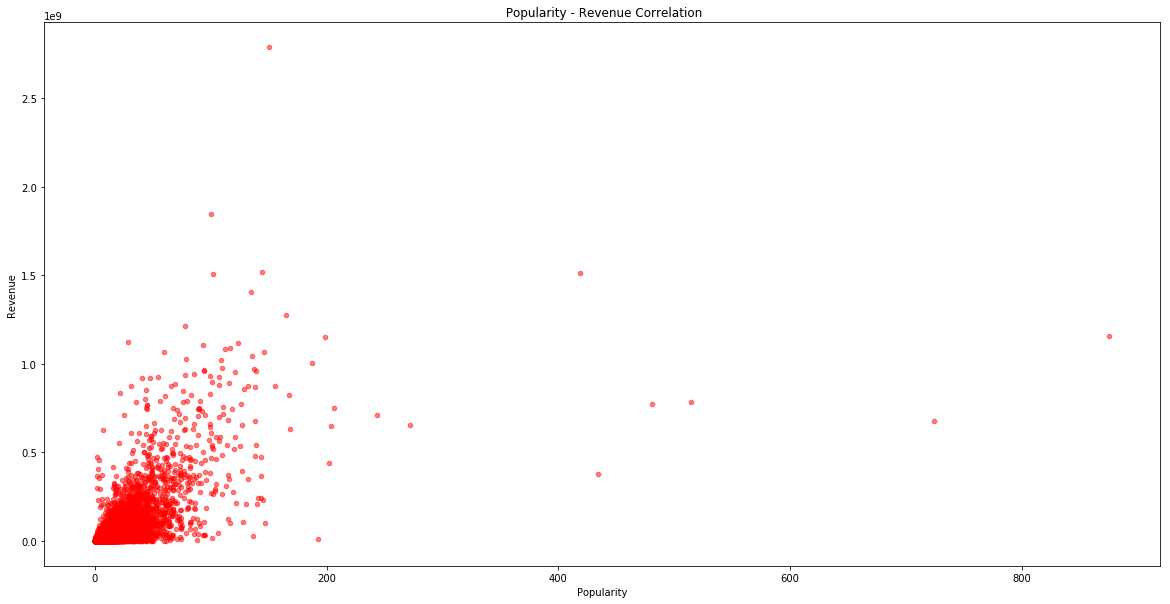

In [14]:
data.plot(kind = 'scatter', x = 'popularity', y = 'revenue', alpha = 0.5, color = 'r', figsize = (20, 10))
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title(' Popularity - Revenue Correlation')
plt.show()

***Let's use filter in popularity what we maded.***

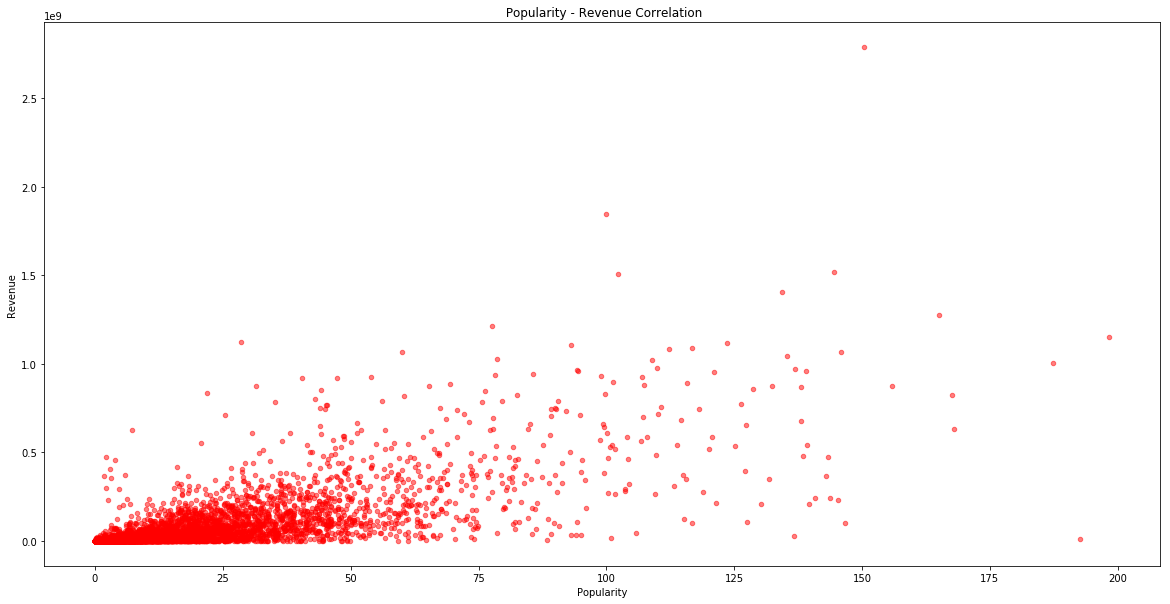

In [15]:
data_filter_popularity.plot(kind = 'scatter', x = 'popularity', y = 'revenue', alpha = 0.5, color = 'r', figsize = (20,10))
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title(' Popularity - Revenue Correlation')
plt.show()

***Let's use second filter in popularity.***

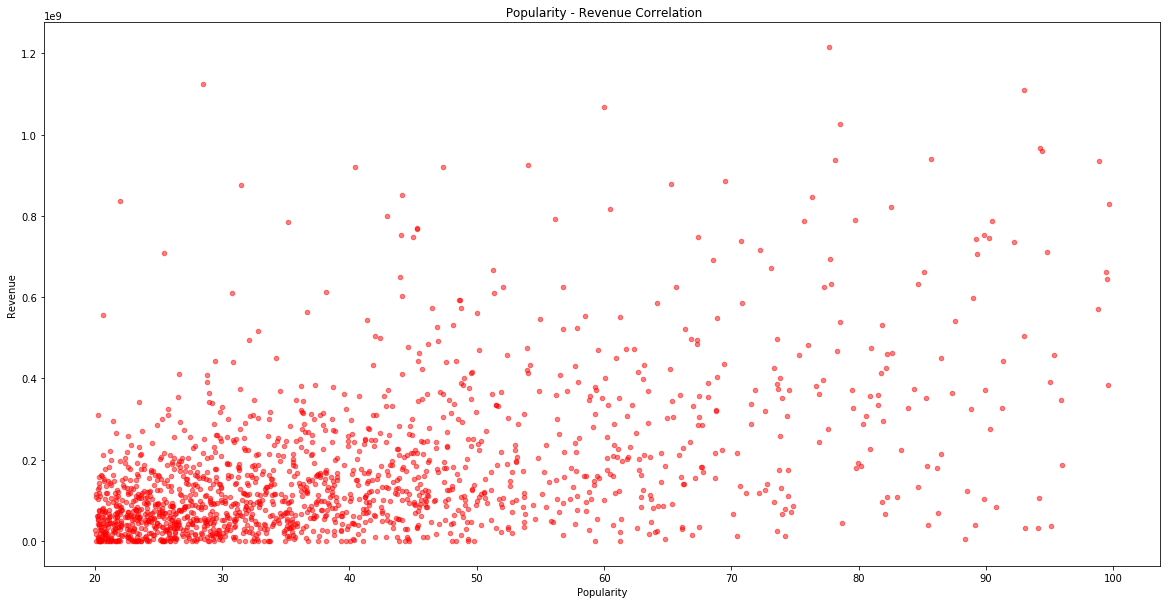

In [16]:
data_filter_popularity_x2.plot(kind = 'scatter', x = 'popularity', y = 'revenue', alpha = 0.5, color = 'r', figsize = (20,10))
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title(' Popularity - Revenue Correlation')
plt.show()

***We looked popularity correlation in both titles.***

**Finally let's look the strongest correlation, correlation between "Budget" and "Revenue"**

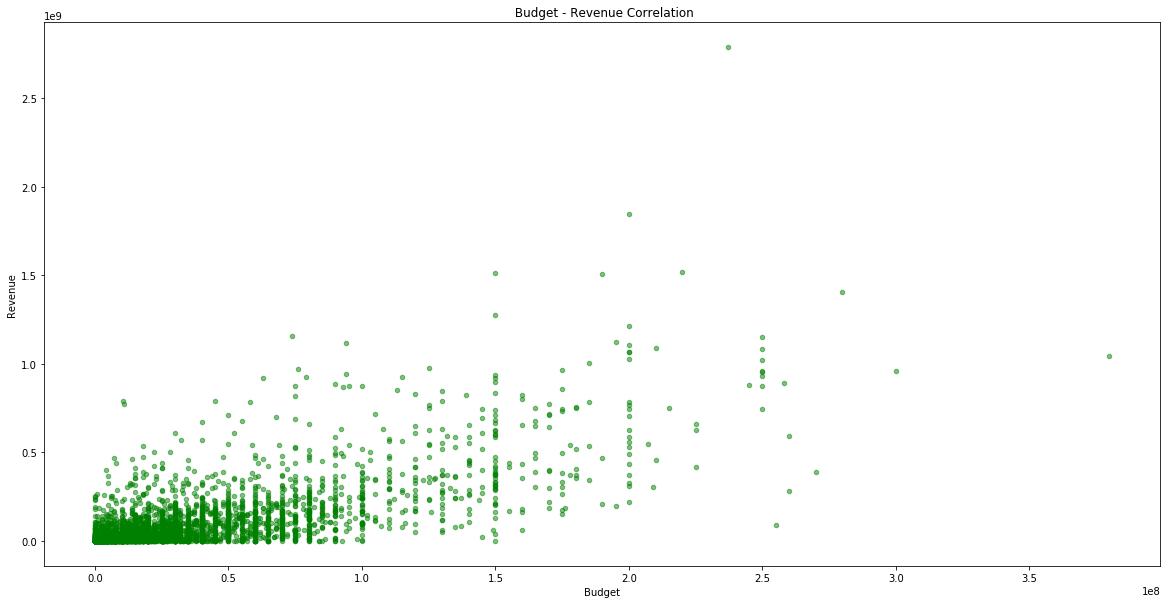

In [17]:
data.plot(kind = 'scatter', x = 'budget', y = 'revenue', alpha = 0.5, color = 'g', figsize = (20,10))
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title(' Budget - Revenue Correlation')
plt.show()

***We see that there is budget value an accumulation between 0 and 1 (x10^8).***

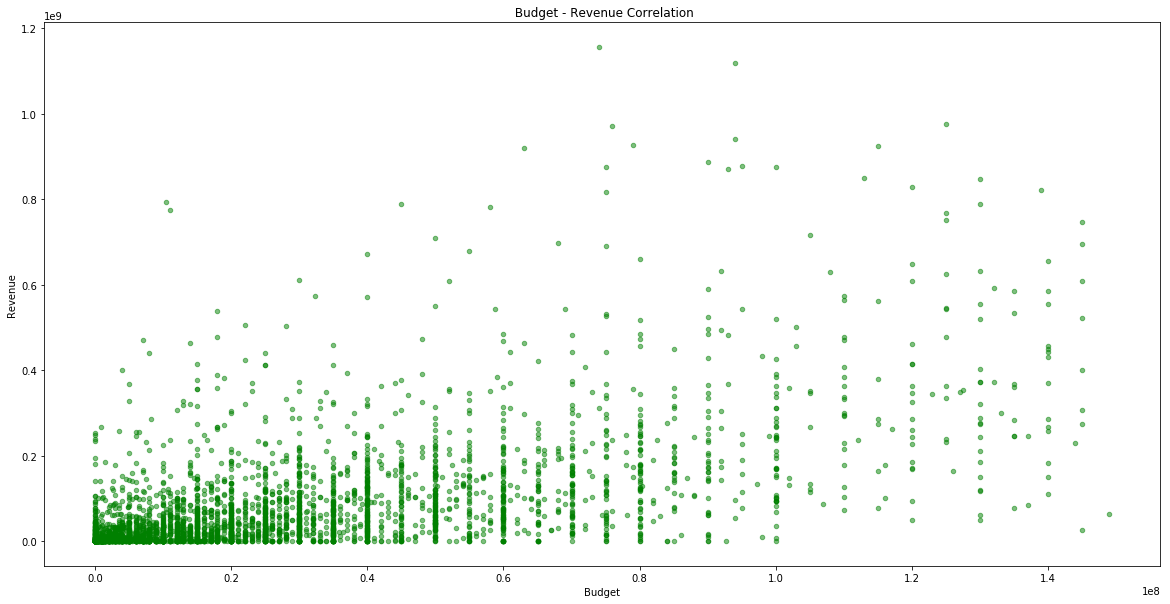

In [18]:
data_filter_b = data['budget'] < 150000000
data_filter_budget = data[data_filter_b]
data_filter_budget.plot(kind = 'scatter', x = 'budget', y = 'revenue', alpha = 0.5, color = 'g', figsize = (20,10))
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title(' Budget - Revenue Correlation')
plt.show()

The easiest way to interpret these three titles is the first filtering. It becomes more difficult to interpret after the second filtering.

**Secondly let's look better movies made by which country.**

In [20]:
data.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

**continue to work on it...**